 # I. Apprentissage supervisé

 ## 1. Principe 
 Donner à la machine des données X et Y afin de trouver l'association entre ces données. Donc trouver F telle que Y = F(X). 

 ## 2. Le Dataset
 Il contient toujours deux types de variables : 
 - La Target Variable (TV) / Target Y : objectif, ce que la machine doit prédire (cours de la bourse, valeur d'un appartement, ...)
 - Les features / Xn : ce sont les paramètres qui vont influencer la variable Y.

 Nb : on note Xm, le nombre de target (lignes Y) que l'on a dans le dataset et Yn le nombres de features que l'on a dans le dataset (le nombre de colonnes). Si on veut s'intéresser à une cellule en particulier, on la note : $ x_n^y $

 Traitement : pour traiter le dataset, on réunie les features et les target comme suit : 

 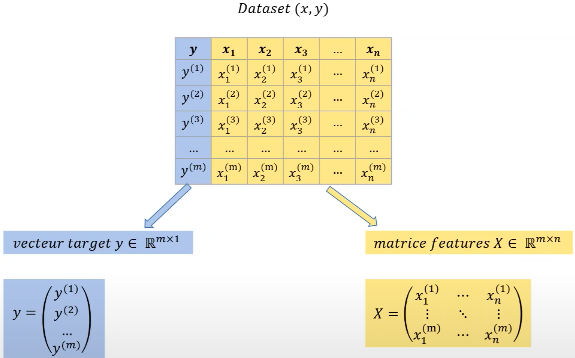

## 3. Le modèle
Il regroupe des paramètres ou degrés de polynomes (a, b, c, ...). C'est à nous de determiner les paramètres, et c'est à la machine de traiter ces paramètres

## 4. La fonction coût
Un bon modèle, est un modèle de généralisation, mais des erreurs (points en dehors du modèle) existent. 
Toutes ces erreurs moyennées donnent la fonction coût

## 5. L'algorithme de minimisation (d'apprentissage)
En ML on va chercher à développer une stratégie qui cherche quels sont les paramètres (a, b, c, d, ...) qui minimisent la fonction coût, c'est à dire l'ensemble des erreurs. Il en existe une multitude (ex : Gradient Descent) 

## 6. En résumé : 
Il existe 4 grandes notions en ML : 
    1. Le dataset : il regroupe les données y (Target) et x (Features).
    2. Le modèle : les paramètres qui sont donnés à la machine et qu'elle doit apprendre. 
    3. La fonction coût : ensemble des erreurs entre les prédictions du modèle et les vraies valeurs du dataset.
    4. L'algorithme de minimisation : cherche à minimiser la fonction coût en trouvant quels sont les meilleurs paramètres.

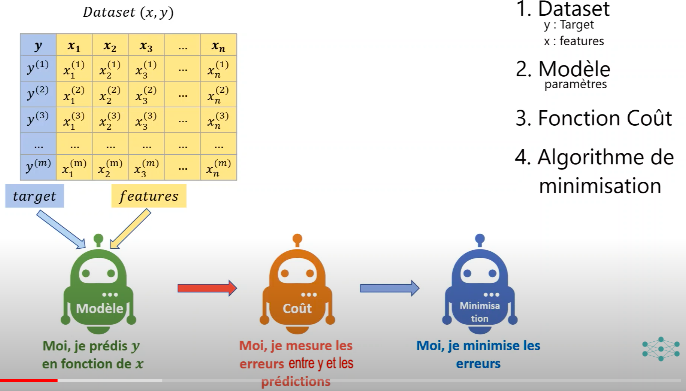

# II. La régression linéaire (partie 1)

## 1. Développement du modèle linéaire
Le modèle de la régression linéaire, est une fonction affine tel que : $ F(x) = ax + b $

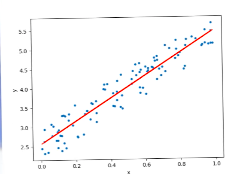

Les paramètres a et b sont inconnus, c'est à la machine de les determiner. Le programme commecera donc avec des paramètres aléatoires

## 2. La fonction coût d'un modèle linéaire
La fonction coût de la regression linéaire est $$ (f(x^{(i)}) - y^{(i)})^2 $$ 

Pour éviter d'avoir des valeurs négatives, on met la fonction coût au carré, en mathématique on appelle cela la norme euclidienne. Il s'agit de la distance entre la prediction et la droite de regression. 
Nb : la fonction coût se fait sur l'ensemble des erreurs du modèle (en rouge ci dessous). 

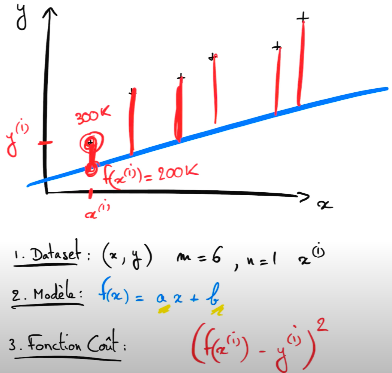

Pour rassembler toutes ces erreurs on utilise J comme fonction coût, tel que : 
$$ J(a,b) = \dfrac{1}{2m} \sum_{i=1}^m (f(x^{(i)}) - y^{(i)})^2 $$

La FC porte le nom d'erreur quadratique moyenne ou mean squared error

## 3. Algorithme de minimisation
Pour trouver le minimum de J par rapport à a, on utilise un algorithme de minimisation qui a une forme parabolique. On peut donc trouver la valeur minimale de a, celle qui va rentrer au mieux dans le nuage de points.

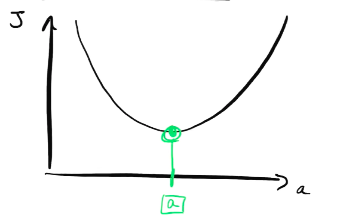

Pour atteindre ce point il y a plusieurs moyens. 

La méthode des moindres carrés : on cherche le point a pour lequel la tangente de J est horizontale. Ce qui donne une pente nulle équivalent de la dérivé de J sur a vaut 0 : 
$$ \dfrac{∂J}{∂a} = 0 $$

Le désavantage de cette méthode est qu'elle implique des inversions de matrice ce qui peut poser problème quand le dataset est composé de million d'exemples

La méthode la plus utilisée pour cela en ML est la descente de gradient ou gradient descent. On prend un point a au hasard sur la courbe J et on mesure la dérivé en direction de la pente qui descent, on avance d'un pas en calculant à nouveau la dérivée, puis encore un pas, etc ... ce qui permettra de converger vers la valeur de a optimale.

 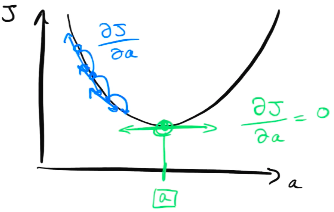

 # III. La descente de gradient 
 
 ## 1. Definitions 
 C'est un algorithme d'optimisation qui convzrge vers le minimu d'une fonction convexe. 

 Une fonction convexe est une hyperbole qui converge vers un seul point minimum. 

 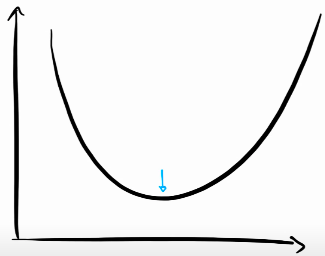

 A l'inverse une fonction non convexe possède plusieurs minimums (plusieurs creux, ou minimums locaux). 

 ## 2. L'algorithme de la descente de gradient 
On commence l'algorithme avec des paramètres a et b choisi au hasard. Puis on calcul la pente par rapport au paramètre a. Calculer une pente revient à calculer une dérivée. On calcule donc la dérivée partielle de J(a, b) par rapport à chaque paramètre : 

$$ \dfrac{∂J(a_{0})}{a} $$

On augmente ensuite d'un petit pas α (ou Learning Rate) qui définit la vitesse de convergence de l'algorithme. On dit que c'est un hyperparamètre. Ce qui nous amène à une position $ a_{1} $. 

Puis on calcule de nouveau la pente avec ce nouveaux paramètre : 

$$ \dfrac{∂J(a_{1})}{a} $$

Et on recommence en boucle : 
1. Calcul de la pente 
2. Petit pas dans la descente

Jusqu'à converger au minimum de la courbe 

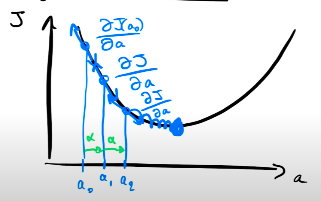

La formule pour implémenter la descente de gradient est : 
$$ 
{
a_{i+1} = a_{i} - α \dfrac{∂J(a_{i})}{∂a} 
}
$$

Cette boucle doit être mise dans un loop, et devient un algorithme iteratif.

## 3. Explication Mathématiques
Le lien entre notre formule de GD et le graphique (ci dessous) est le suivant.
En prenant $ a_{0} $ au hasard on peut calculer $ a_{1} (I=0) $ , donc $ a_{i+1} = a_{1} $

Ce qui donne pour l'algorithme itératif : 
$$ a_{0+1} = a_{0} - α \dfrac{∂J(a_{0})}{∂a} $$

En calculant la dérivée de J, cette dernière sera négative et diminuera en fonction que a augmente. 

Donc $ \dfrac{∂J(a_{0})}{∂a} < 0 $.
Et le produit $ α \dfrac{∂J(a_{0})}{∂a} < 0 $.

NB : L'hyperparamètre α est toujours positif. 

On aura donc : 
$$ a_{1} = a_{0} - α \dfrac{∂J(a_{0})}{∂a} $$

La dérivée sera également négative, ce qui fera avancer a. 

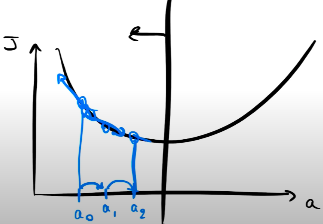

Si aléatoirement, le paramètre $ a_{0} $ se trouve a droite du minimum, dans ce cas la dérivée obtenue est négative 

Donc le terme $ α \dfrac{∂J(a_{0})}{∂a} > 0 $. 

Ainsi $$ a_{1} = a_{0} - α \dfrac{∂J(a_{0})}{∂a} > 0 $$

Et donc peu importe la position de $ a_{0} $ on convergera toujours vers le minimum. 

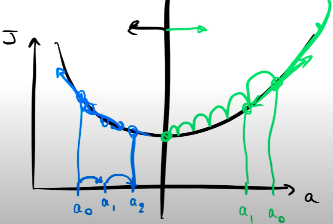

## 4. Importance du Learning Rate (α)
Si on choisit une mauvaise valeur pour le paramètre α, on risque de développer un mauvais modèle de ML.

Si α est trop grand, on fera de trop grand pas et on oscillera autour de notre objectif sans jamais l'atteindre (minimum de la FC). 

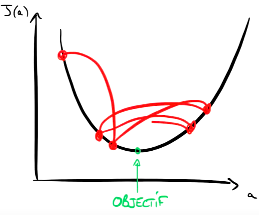

A l'inverse s'il est trop faible, on risque de mettre un temps infini pour atteindre notre objectif. 

## 5. Le calcul de gradient 
Pour rappel : 

$$ a = a - α \dfrac{∂J}{∂a} $$

$$ b = b - α \dfrac{∂J}{∂b} $$

Dans ces équations nous avons des dérivées à calculer. 

La fonction coût, pour l'erreur quadratique moyenne est : 

$$ J(a,b) = \dfrac{1}{2m} \sum_{} (ax + b - y)^2 $$

Si l'on cherche à dériver cette fonction par rapport à a, alors on cherche la dérivée partielle de J par rapport à la dérivée partielle de a. 

J(a, b) est une composée de fonctions (g ○ f)(a, b).
f(a, b) = ax + b.
g(f) = $ f^2 $.

Rappel : (g ○ f)' = f' * g'(f).

Donc si on dérive J par rapport à a :
$$ \dfrac{∂J}{∂a} = \dfrac{1}{m}  \sum_{} x (ax + b - y) $$

Il nous reste plus qu'à intégrer ce calcul pour le paramètre a : 

$$ a = a - α \dfrac{1}{m} \sum_{} x (ax + b - y) $$

Pour le paramètre b : 
$$ \dfrac{∂J}{∂b} = \dfrac{1}{m}  \sum_{} (ax + b - y) $$

Ce qui nous donne l'expression à intégrer pour ce paramètre, soit : 

$$ b = b - α \dfrac{1}{m} \sum_{} (ax + b - y) $$

Pour résumer, voici notre modèle de ML : 

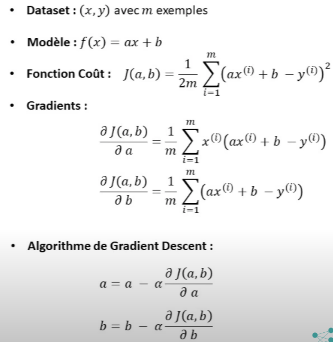

# IV. Matrices et Numpy

Pour rappel : une matrice avec m lignes et n colonnes est de dimmension (m x n). 

Il est favorable de toujours noter les dimensions de nos matrices pour eviter les erreurs de calcul.

In [5]:
# Import de numpy
import numpy as np

# Déclaration d'une matrice avec numpy
A = np.array([[1, 2], [3, 4], [5, 6]])

# Affichage de la matrice 
A

# Affichage des dimensions de la matrice 
A.shape

# Transposée de la matrice A 
A.T

# Création d'une matrice B composée uniquement de 1 
B = np.ones((3, 2))

# Addition des matrices A et B 
A + B

array([[2., 3.],
       [4., 5.],
       [6., 7.]])

Rappel : pour faire le produit entre A et B il faut autant de colonnes dans A que de ligne dans B. 

Lorsque l'on fait le produit, la dimension de C est alors m X z, on garde les extremes de chaque matrice multipliée.

Pour le produit, l'ordre des matrices est important. 

Exemple : Dans le cas ci-dessous il est possible de faire le produit matritiel de A.B mais pas de B.A.

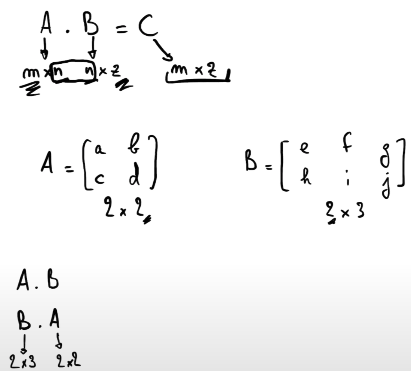

Pour faire le produit matritiel du premier élèment de A.B, il faut additionner la première ligne de A et la première colonne de B. 
Etant donné que ce dernier se trouve en position deuxième colonne, première ligne, nous devons faire le produit de la première ligne de A et de la seconde colonne de B, etc ...

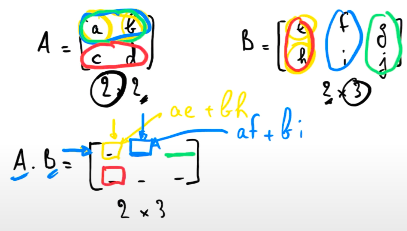

In [7]:
# Pour faire le produit matriciel de A et de B, il faut utiliser la transposée de B, car cette dernière est de dimension (3, 2) comme pour A
A.dot(B.T)

array([[ 3.,  3.,  3.],
       [ 7.,  7.,  7.],
       [11., 11., 11.]])

# V. La regression linéaire (partie 2)

## 1. Rappel 

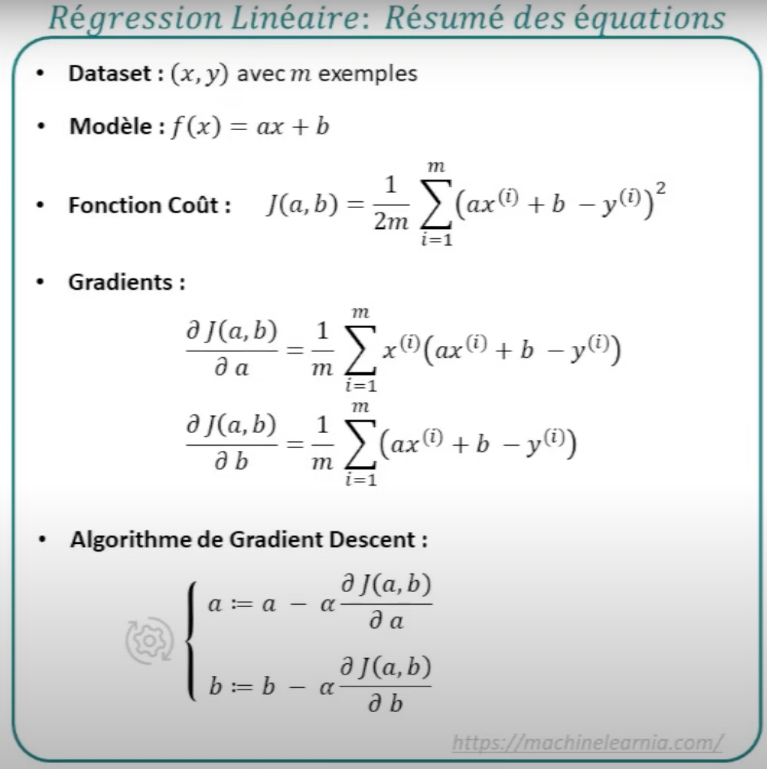

## 2. Le modèle F

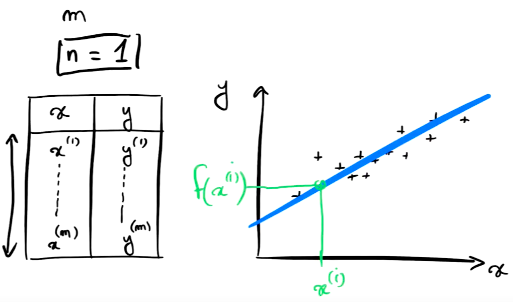

Ce modèle pose un problème car nous ne pouvons pas calculer instantanément toutes les valeurs de $ F(x) $ pour tous les $ x_i $ de notre DS. Pour ce faire on regroupe toutes les données du DS dans une matrice, afin d'effectuer un seul calcul sur l'ensemble des données.

On crée alors un vecteur F, avec toutes les valeur de $ x_1 $ à $ x_m $, ce vecteur est égal au produit matriciel en une matrice x et un vecteur paramètre θ. Ce dernier va contenir les paramètres du modèle, dans notre cas à savoir a et b. X est une matrice contenant les x allant de $ x_1 $ à $ x_m $, et une colonne composée uniquement de 1, de telle sorte à ce que lorsquel'on fait le calcul matriciel on obtient : 

$$ f(x^{1}) = ax*1 + b $$

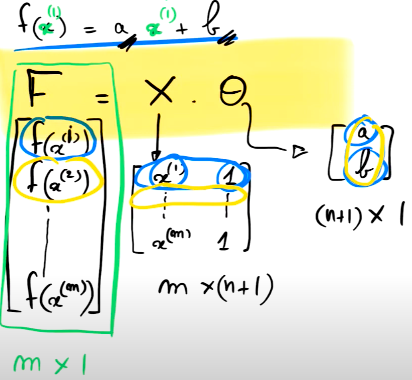

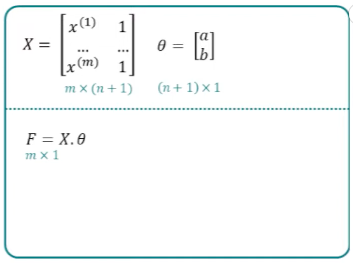

Le paramètre b, et la colonne de "1" représentent les biais de notre DS.

## 3. La fonction coût J
Rappel : la FC que l'on a dans notre modèle est : 
$$ J(a,b) = \dfrac{1}{2m} \sum_{i=1}^m (ax^{(i)} + b - y^{(i)})^2 $$

Pour l'exprimer sous forme matricielle, on ne cherche pas à exprimer J sous forme de vecteur. Ce serait illogique car J est notre erreur (ou coût), il s'git d'un scallaire, en l'occurence la moyenne de toutes nos erreurs. 

Dans cette FC nous retrouvons $ ax^{(i)} + b $ que l'on peut remplacer par $ Xθ $ avec pour dimension (m * 1). Quant aux y on les met dans un vecteur Y qui est aussi de dimension (m * 1). 

On va donc écrire : $ Xθ - Y $ nous obtenons alors un vecteur encore de dimension (m * 1), et les données de ce vecteur sont mises au carré. 

Puis la somme du 1er élément au dernier élémént (m). Et diviser le tout par $ \dfrac{1}{2m} $. On obtientdonc au final une matrice de dimension (1 * 1)

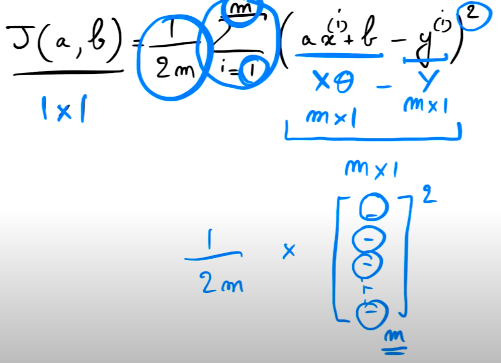

La FC sous forme matricielle est donc : 
$$ J(θ) = \dfrac{1}{2m} \sum_{i=1}^m (Xθ - Y)^2 $$

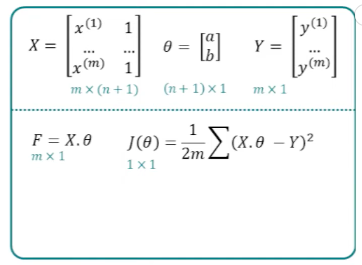

## 4. Le gradient 
Rappel : Pour le moment nous avons le calcul pour 2 gradients. 

$$ \dfrac{∂J(a, b)}{∂a} = \dfrac{1}{m} \sum_{} x (ax + b - y) $$
$$ \dfrac{∂J(a, b)}{∂b} = \dfrac{1}{m} \sum_{} 1 (ax + b - y) $$

Pour mettre sous forme matricielle ces gradient, on va mettre les deux dans un vecteur unique. Ce dernier sera le vecteur qui va calculer toutes les dérivées de J par rapport à tous les paramètres du vecteur θ. Ce vecteur est de dimension (n + 1) * 1 : 

$$ \dfrac{∂J(θ)}{∂θ} = \dfrac{1}{m} X^{T} (Xθ - Y) $$

Demonstration : $ Xθ - Y $ est la forme matricielle de $ ax + b - y $ (retrouvée dans les deux équations). 

$ X^{T} $ est la somme de la matrice (X) allant de $ x^{i} $ à $ x^{m} $ et la matrice composée de "1" qui nous donne également les nouvelles dimensions (n + 1) * m. En la transposant on multiplie les $ x $ par 1. 

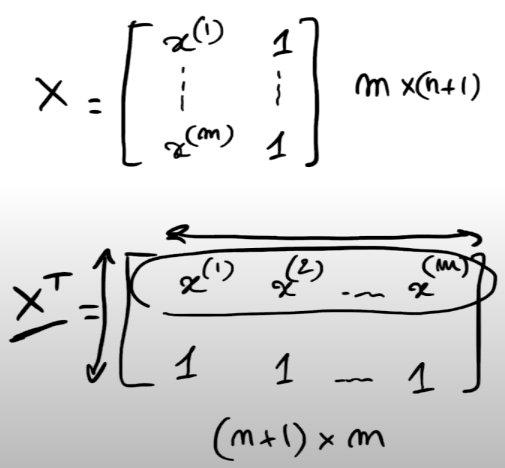

La première matrice est la somme de la première équation (a) où nous retrouvons les x, et la deuxième celle où nous avons les 1. 

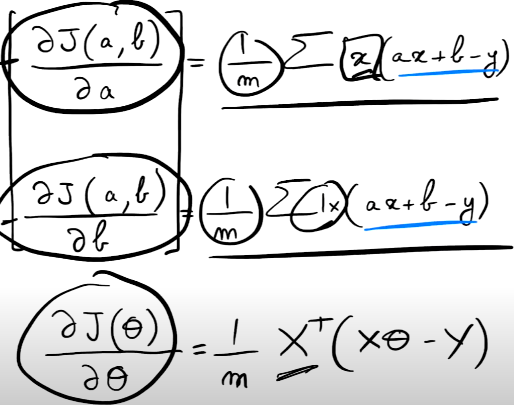

Voila pourquoi avec la transposée de X on peut d'un coup calculer tous les gradients de notre modèle.

Les dimensions du produit matriciel de $ X^{T} (Xθ - Y) $ donnent pour $ X^{T} $ (n + 1) * m et $ (X.θ - Y) $ m * 1. Ainsi les dimensions résiduelles donnent (n + 1) * 1.  

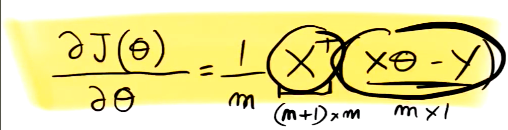

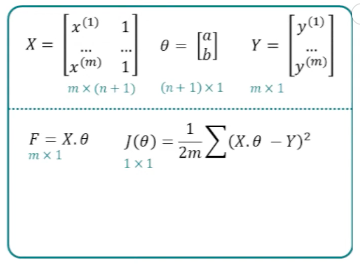

## 5. Gradient Descent
Rappel : lorsque l'on met les paramètres a et b dans un vecteur, on obtient le θ 

Comme pour les gradients, nous mettons le reste des équations dans un vecteur, ce qui donne : 
$$ θ = θ - α - \dfrac{∂J}{∂θ} $$

Les dimensions de la matrice restent encore une fois cohérentes car θ est de dimension (n + 1) * 1 et $ α - \dfrac{∂J}{∂θ} $ est de dimension (n + 1) * 1. 

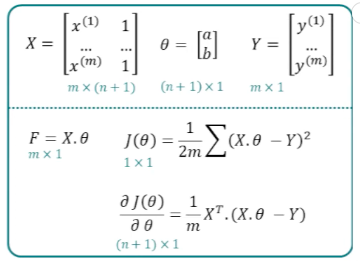

## 6. Regression polynômiale
Si nous prenions une fonction polynômiale F nous permettant de tracer une courbe de forme $ F(x) = ax^{2} + bx + c $.

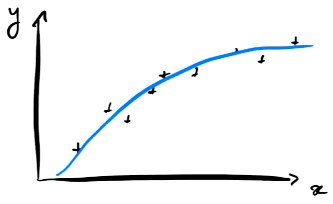

Si nous essyaions d'appliquer la méthode précédente sur cette fonction, nous aurions une FC plus et plus complexe, avec trois gradients à calculer avec dans chacun plus de facteurs etc ... 

Pour pallier à ce problème on oublie le polynôme et on écrit à la place : 
$$ F = Xθ $$

Démonstration : θ est le vecteur rassemblant tous les paramètres (a, b, c) et X est la matrice dans laquelle nous aurons trois colonnes : 
- La première : $ x_(1)^{2} $ jusque $ x_(m)^{2} $. 
- La deuxième : $ x_(1) $ jusque $ x_(m) $. 
- La troisième : composée uniquement de 1. 

Les dimensions sont ici (m * n) + 1 où $ n $ vaut 2.

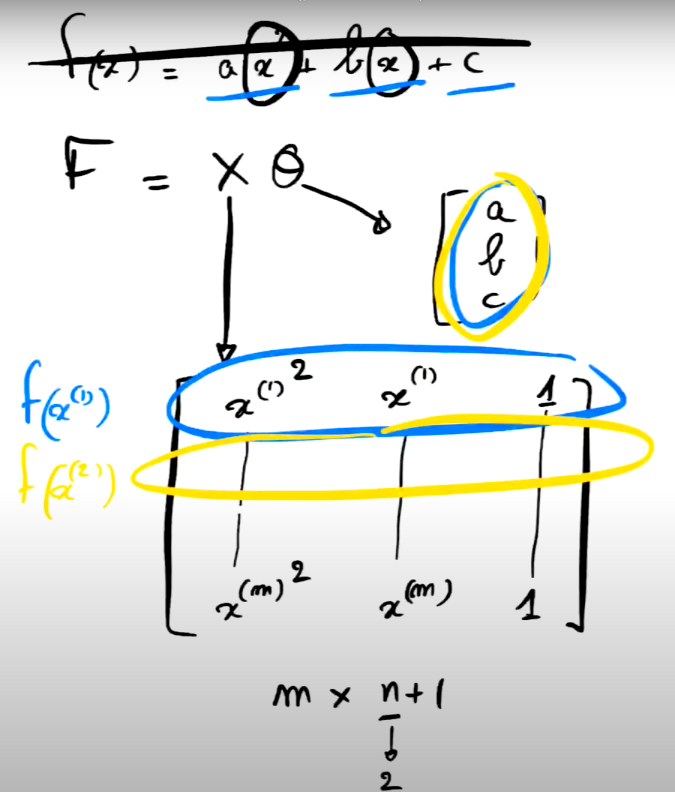

## 7. En résumé 

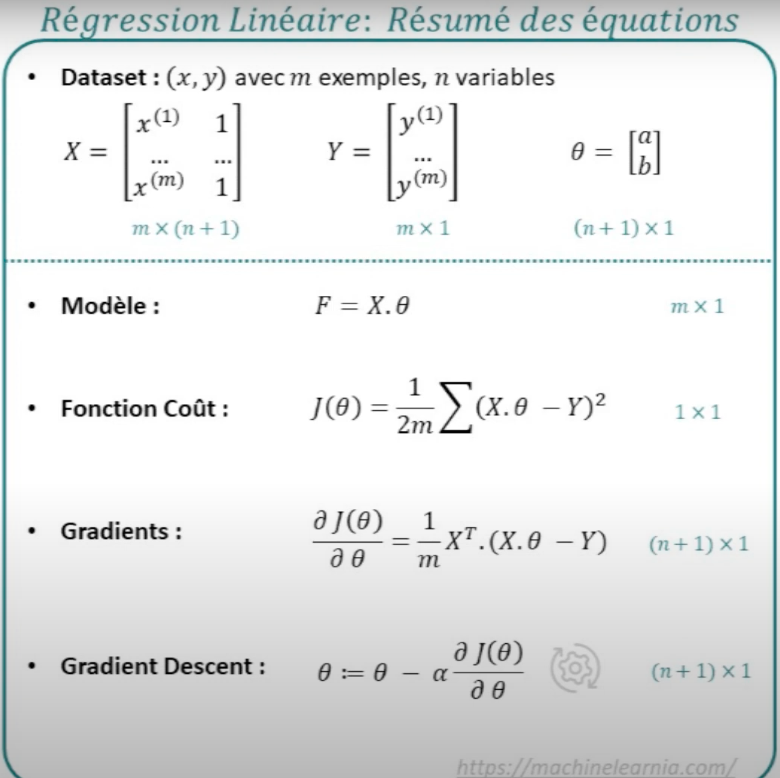



# VI. Regression linéaire Numpy

In [5]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1. Le Dataset

Make regression permet la génération de données, que nous allons placer dans deux tableaux $ x $ et $ y $. 
- n_samples permet de définir le nombre d'échantillons souhaités 
- n_features permet de définir le nombre de variables 
- noise permet de définir le bruit

Plt.scatter, qui est une fonctionnalité de matplotlib, permet d'observer le DS sous forme de graphique, plus précisément dans notre cas $x$ en fonction de $y$

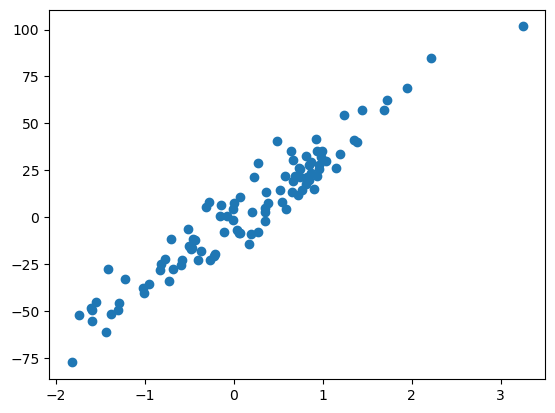

In [8]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)

/!\ Toujours avoir le reflexe d'afficher les dimensions des matrices pour éviter les erreurs de calculs par la suite /!\
Pour afficher les dimensions il faut utiliser .shapes de Numpy

Le résultat obtenu pour nos matrices est : 
- x a pour dimension (100, 1)
- y a pour dimension (100,)

Cela est du à la fonction make regression. Quand cela arrive il faut réécrire les dimensions de la matrice qui est incomplète, pour ce faire on utilise la .reshape

In [11]:
# Affichage de la dimension de nos matrice
print(x.shape)
# Redimension de la matrice y, on peut aussi redimensionner en saisissant en dur
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


Pour créer des matrices avec numpy, on utilise la fonctionnalité .hstack. Elle permet de coller ensemble deux vecteurs numpy l'un à coté de l'autre.

In [15]:
# Création de la matrice X, avec le vecteur x, et une colonne de biais "1" avec autant de lignes qu'il y en a dans x
X = np.hstack((x, np.ones(x.shape)))
X

array([[-8.25490249e-01,  1.00000000e+00],
       [-7.10724274e-01,  1.00000000e+00],
       [ 1.72546704e+00,  1.00000000e+00],
       [-1.12882590e-01,  1.00000000e+00],
       [ 7.43428394e-01,  1.00000000e+00],
       [ 7.22114554e-01,  1.00000000e+00],
       [ 1.18777973e+00,  1.00000000e+00],
       [-5.97281347e-01,  1.00000000e+00],
       [ 5.71571816e-01,  1.00000000e+00],
       [ 6.58533111e-01,  1.00000000e+00],
       [ 8.16135167e-01,  1.00000000e+00],
       [ 9.89217172e-01,  1.00000000e+00],
       [ 2.26411365e-01,  1.00000000e+00],
       [ 1.03412614e+00,  1.00000000e+00],
       [-1.58272984e-03,  1.00000000e+00],
       [-1.60231204e+00,  1.00000000e+00],
       [ 2.66745062e-01,  1.00000000e+00],
       [ 1.38361134e+00,  1.00000000e+00],
       [-4.77700150e-01,  1.00000000e+00],
       [ 9.36727042e-01,  1.00000000e+00],
       [ 9.77918814e-01,  1.00000000e+00],
       [ 9.55483098e-01,  1.00000000e+00],
       [-1.46835089e-01,  1.00000000e+00],
       [ 4.

In [17]:
# Initialisation du vecteur theta de dimension (2,1) pour les paramètres a et b, avec des paramètres aléatoires
theta = np.random.rand(2, 1)
theta

array([[0.95500555],
       [0.3912572 ]])

## 2. Le modèle Linéaire

Rappel notre modèle est une fonction : $ F = X.θ $

In [18]:
# Création de la fonction, elle ne retourne juste le produit matriciel X et θ
# Le produit matriciel est donné par la fonction .dot
def model(X, theta):
    return X.dot(theta)

/!\ Toujours tester les fonctions mathématiques avant de les tester pour éviter toute erreur /!\

Ce qui est interessant de voir, est les résutats de notre modèle sur les données du DS x.
Nous pouvons aussi ajouter par dessus les points du DS.

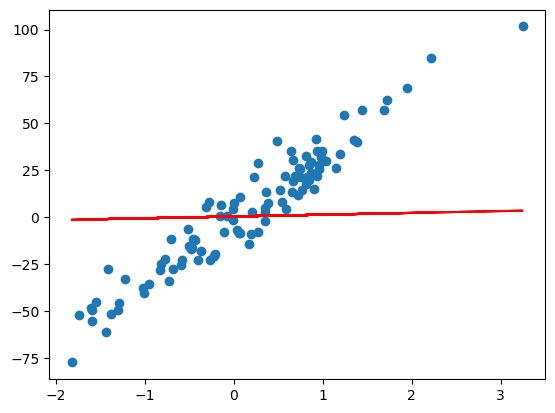

In [22]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

## 3. La fonction coût

Rappel : $ J(θ) = \dfrac{1}{2m} \sum{(X.θ - Y)^{2}} $. Il s'agit de l'erreur quadratique moyenne. 

Dans la FC, m est le nombre d'éxemples que l'on a dans le DS. 

In [23]:
# Création de la fonction cout avec comme paramètres : 
# - X : le modèle définit ci dessus 
# - y : nombre d'exemples qu'il y a dans le DS
# - theta : les paramètres du modèle, pour la regression linéaire : a, b
def cost_function(X, y, theta):
#   m est la taille du vecteur y
    m = len(y)    
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [24]:
cost_function(X, y, theta)

510.1929034278219

## 4. Gradients & Descente de gradients 

Rappel : $ \dfrac{∂J(θ)}{∂θ} = \dfrac{1}{m} X^{T} (X.θ - Y) $

In [25]:
# Definition du gradient avec X = le modèle, y = nb d'exemples du DS, theta = les paramètres a et b du modele
def grad (X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

Rappel sur la descente de gradient : $ θ := θ - α \dfrac{∂J(θ)}{∂θ} $

In [26]:
# Definition de la descente de gradient avec comme paramètres : 
#   - X = definition du modele
#   - y = nombre d'exemples présents dans le DS 
#   - theta = les paramètres a et b de la regression linéaire
#   - leanring_rate = pas d'apprentissage alpha / hyperparamètre alpha 
#   - n_iterations = itration de l'algo pour la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
#       Mise à jour de theta        
        theta = theta - learning_rate * grad(X, y, theta)
    return theta

## 5. Entrainement du modele

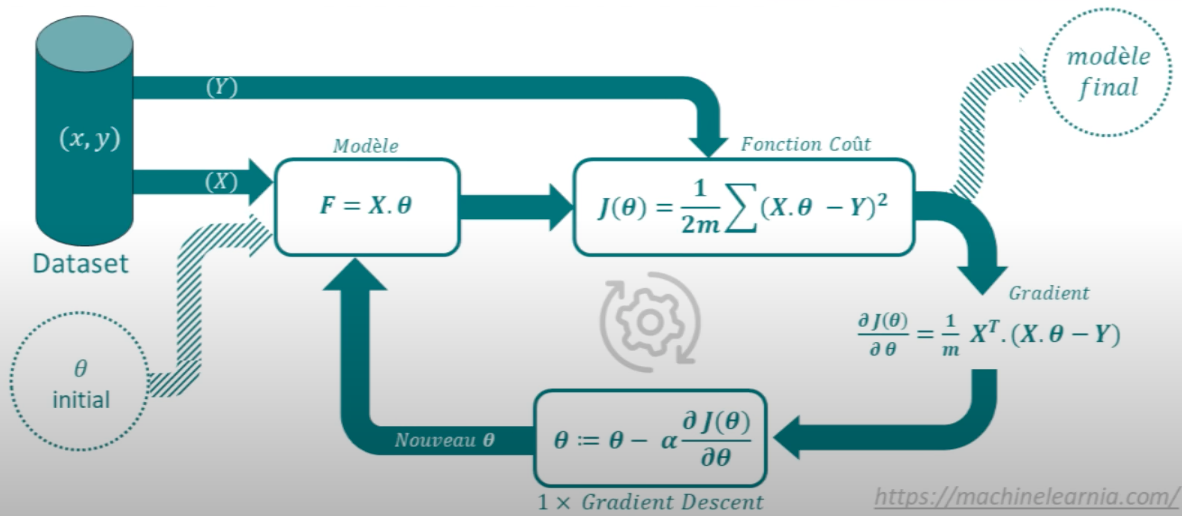

Après avoir entrainé le modèle dont la valeur est contenue dans la variable theta_final, ensuite avec le vecteur prediction il faut analyser si ce vecteur paramètres donnent de bons résultats. 
Ce dernier sera égal au résultat de notre modèle $ X $ et des paramètres theta finaux. 

Résultat obtenu après entrainement de notre modèle : 

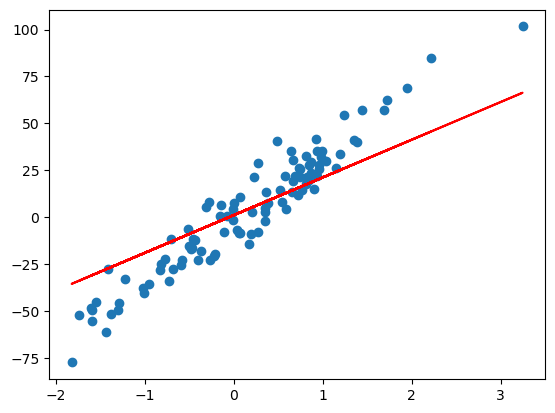

Analyse du plot obtenue : 
- On peut améliorer ce résultat car : 
    - L'apprentissage n'est pas terminé 
    - Pour compléter cet apprentissage nous avons deux choix ( 1/ augemnter n_iterations, mais cela augmentera le temps de travail de la machine ; 2/ augmenter le learning_rate)
    - Pour améliorer notre apprentissage nous allons choisir cette deuxième option. Car en réalité nous faisons ici de trop petit pas dans la gradient descent. Pour ce faire nous passons ce paramètre de 0.001 à 0.01

Résultat après diminution du learning_rate : 

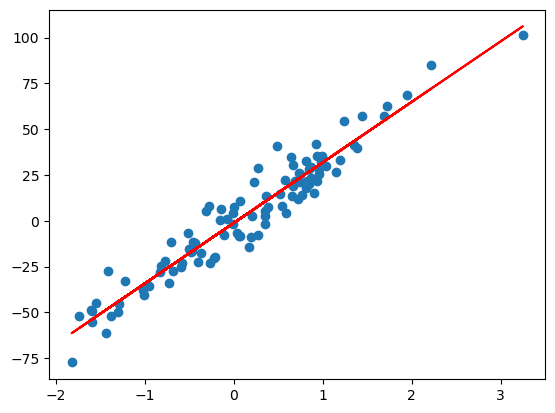


In [30]:
# Création du theta final après appel du gradient descent
theta_final = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [31]:
theta_final

array([[33.05174759],
       [-1.12756451]])

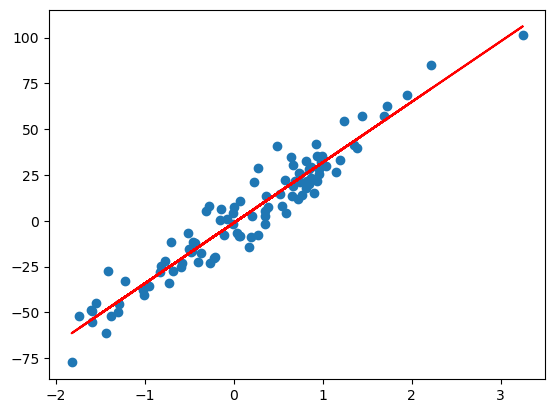

In [32]:
predictions = model(X, theta_final)

# Affichage du vecteur predictions avec matplotlib
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

## 6. Courbe d'apprentissage

Pour ce faire nous allons rajouter quelques lignes dans notre algorithme de la descente de gradient avec la variable cost_history, pour ce faire : 
- Dans un premier lieux, on doit initialiser ce tableau à zéro avec autant de lignes qu'il y a d'itérations. 
- Puis à chaque tour de boucle on sauvegarde dans le tableau le coût à la $ i^{ème} $ itération. 
- Et enfin la retourner en fin d'algorithme

Il faut également ajouter cette variable dans l'entrainement du modèle afin de pouvoir l'afficher avec matplotlib

Dans la courbe obtenue ci dessous, nous avons tracé un plot sur 1000 point avec range(1000). Grâce à cette courbe nous pouvons analyser que nous aurions pu limiter l'entraimenet à environ 400 iterations, afin d'économiser du temps sur la machine.

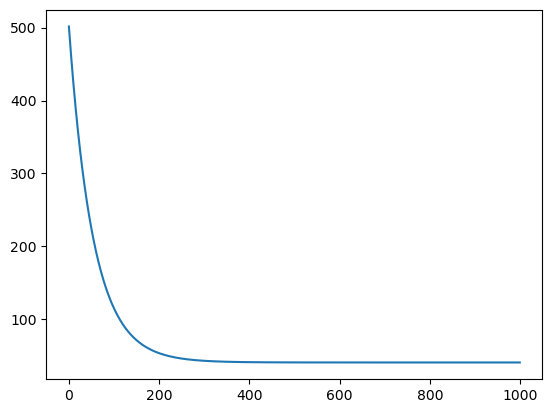


In [33]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [34]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

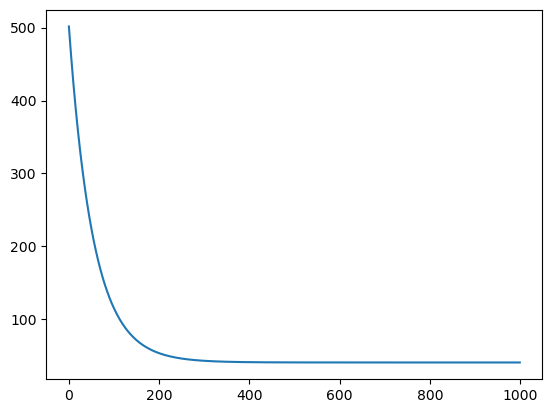

In [35]:
plt.plot(range(1000), cost_history)

## 7. Coefficient de determination

Il permet d'évaluer la performance d'un modèle de régression linéaire. Il s'agit en réalité du coefficient $ R^{2} $.

Rappel : $ R^{2} = 1 - \dfrac{\sum_{} (y - f(x))^{2}}{\sum_{} (y - ȳ)^{2}} $.

Nb plus $ R^{2} $ est proche de 1 plus le modèle est fiable.

Le plus simple pour calculer le coefficient de détermination, est de le diviser en deux sous variable $ u $ et $ v $ : 
- $ u $ : est le résidu de la somme des carrés. C'est à dire la différence entre les vraies valeurs et les valeurs prédites par le modèle, au carré. Puis on en prend la somme.
- $ v $ : est la somme totale des carrés. C'est la différence entre les y et la moyenne de ces y, mis au carré. Et on en prend la somme.

Il est donc maintenant possible de calculer notre vecteur prediction. Le résultat obtenu pour notre modèle est 0,924 soit 92%.

In [38]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [40]:
coef_determination(y, predictions)

0.9235208694833832

# VII. Régression linéaire multiple avec Numpy

## 1. Théorie mathématiques

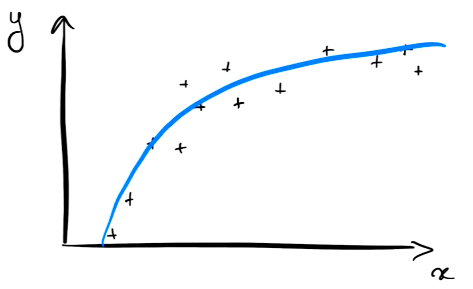

Pour le nuage de points ci dessus, nous ne pourrions pas utiliser un modèle de regression linéaire de la forme $ f(x) = ax + b $, à la place nous allons plutôt utiliser un modèle polynômial.

Ce modèle sera de degré 2, c'est à dire $ f(x) = ax^{2} + bx + c $

De ce fait le polynôme de degré 2, rend les équations plus compliquées : 

- La FC : elle possède à présent 3 paramètres (a, b, c)

$ J(a, b, c) = \dfrac{1}{2m} \sum{(ax^{2} + bx + c - y)^{2}} $.

- Les gradients : il y a à présent 3 gradients à calculer et pour chacun une expression particulière 

$ \dfrac{∂J}{∂a} = \dfrac{1}{m} \sum{2x^{2} (ax^{2} + bx + c - y)} $.

$ \dfrac{∂J}{∂b} = \dfrac{1}{m} \sum{x (ax^{2} + bx + c - y)} $.

$ \dfrac{∂J}{∂c} = \dfrac{1}{m} \sum{1 * (ax^{2} + bx + c - y)} $.

- La descente de gradients est elle aussi rendue plus complexe 

$ a := a - α \dfrac{∂J}{∂a} $.

$ b := b - α \dfrac{∂J}{∂b} $.

$ c := c - α \dfrac{∂J}{∂c} $.

On se rend vite de la complexité supérieure, ici juste pour un polynôme de degré 2. Cela va vite devenir impossible pour des équations avec des polynômes de degré supérieurs.
Cependant il est possible de contenir toute cette compléxité dans des équations très simples, il s'agit de convertir nos équations sous forme matricielle (cf : VI. Régression linéaire Numpy). 

Pour ce faire on utilise la formule $ F = X.θ $.

Où : 
- $ X $ est une matrice de dimension (m * " 3). Qui contient les différents degrés de notre modèle. Avec comme colonnes : 
    -  De $ x_i^{2} $ à $ x_m^{2} $
    -  De $ x_i $ à $ x_m $
    -  De $ 1_i $ à $ 1_m $
- $ θ $ sont les paramètres de notre modèle (a, b, c) et donc de dimension (3 * 1)

De ce fait quelque soit la complexité que l'on vise, on aura toujours pour : 
- La fonction coût : 
    - $ J(θ) = \dfrac{1}{2m} \sum{(X.θ - Y)^{2}} $
- Les gradients : 
    - $ \dfrac{∂J(θ)}{∂θ} = \dfrac{1}{m} X^{T} (X.θ - Y) $
- La descente de gradient : 
    - $ θ := θ - α \dfrac{∂J(θ)}{∂θ} $

En résumé :
Nous pouvons donc utiliser le programme de regression linéaire de la partie précédente pour développer des modèles beaucoup plus complexe et beaucoup plus riche. Il suffit juste pour cela 
de modifier le contenu de la matrice $ X $ et du vecteur $ θ $

## 2. Régression polynômiale avec Numpy

### 2.1. Le Dataset

In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

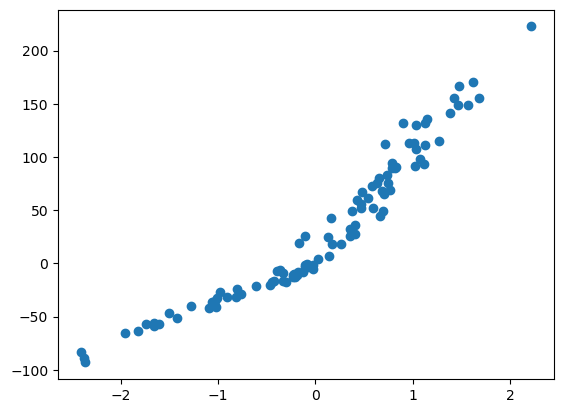

In [6]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2)

plt.scatter(x,y)

In [9]:
# Verification des dimensions des matrices 
print(x.shape)
print(y.shape)

# Redimension de y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [12]:
# Création de la matrice X, inclut le biais 
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
print(X.shape)

print(X[:10])

(100, 3)
[[ 0.05032069 -0.22432274  1.        ]
 [ 0.22107966  0.47019109  1.        ]
 [ 0.59497432  0.77134579  1.        ]
 [ 0.02739214 -0.16550571  1.        ]
 [ 3.81715716 -1.95375463  1.        ]
 [ 1.9076025   1.38115984  1.        ]
 [ 2.83945327  1.68506773  1.        ]
 [ 0.15872805 -0.39840689  1.        ]
 [ 1.01504023 -1.00749205  1.        ]
 [ 0.01189931 -0.10908395  1.        ]]


In [13]:
# Initialisation du vecteur theta aléatoire 
theta = np.random.randn(3, 1)
theta

array([[-0.66663401],
       [ 0.37537532],
       [-1.38974057]])

### 2.2. Le modèle 
On implémente un modèle $ F = X.θ $, puis on test le modele pour voir s'il n'y a pas de bug (bonne pratique oblige). En plus, cela permet e voir à quoi ressemble le modèle initial, définit par la valeur de $ θ $.

In [14]:
def model(X, theta):
    return X.dot(theta)

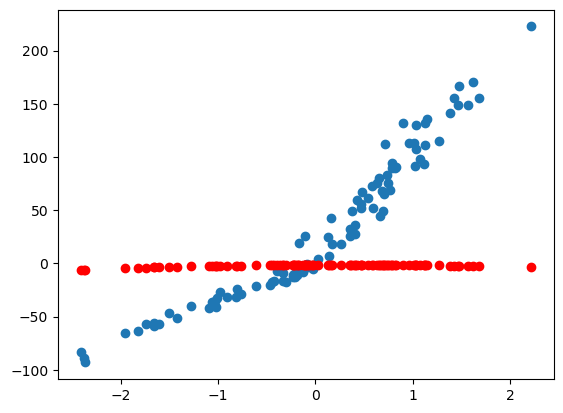

In [15]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c='r')

### 2.3. La fonction coût : Erreur Quadratique Moyenne 

On mesure les erreurs sur le DS X, y en implémentant l'erreur quadratique moyenne ou Mean Squarred Error (MSE). 

$ J(θ) = \dfrac{1}{2m} \sum{(X.θ - y)^2} $

Ensuite on teste la fonction pour s'assurer qu'il n'y ait pas de bug

In [16]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [17]:
cost_function(X, y, theta)

2884.733118189015

### 2.4. Gradients et descente de gradients 

On implémente la formule du gradient pour la MSE. 

$ \dfrac{∂J(θ)}{∂θ} = \dfrac{1}{m} X^{T}.(X.θ - y) $

On utilise ensuite cette formule dans la desente de gradient.

$ θ := θ - α \dfrac{∂J(θ)}{∂θ} $

In [18]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [19]:
def gradient_descent(X, y, theta, learning_rate, n_iterations): 

    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

### 2.5. Phase d'entrainement 

On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage $ α $, et c'est parti !

Une fois le modèle entrainé, on observe les résultats par rapport à notre DS.

In [20]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [21]:
theta_final # Voici les paramètres finaux une fois que la machine a été entrainée

array([[14.15135473],
       [71.21713146],
       [14.60185694]])

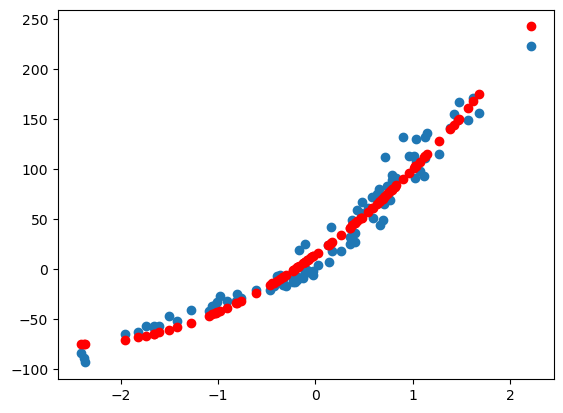

In [23]:
# Création d'un vecteur prédictions qui contient les predictions de notre modele finale
predictions = model(X, theta_final)

# Affichage des résultats de predictions (en rouge)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')

### 2.6. Courbe d'apprentissage 

Pour vérifier si notre algorithme de la descente de gradient a bien fonctionné, on observe l'évolution de la fonction coût à travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'à stagner à un niveau minimal(proche de zéro). Si la courbe ne suis pas ce motif, alors le learning_rate est peut-être trop élevé, il faut prendre un pas plus faible. 

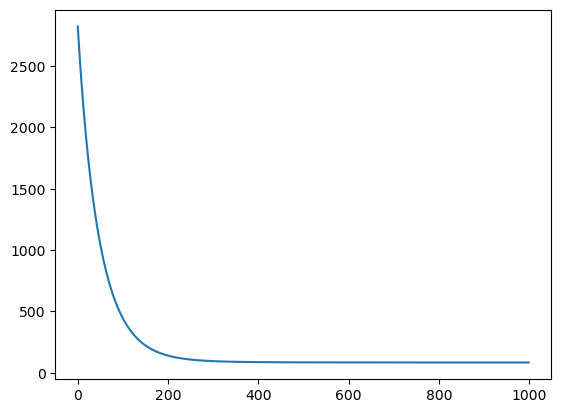

In [24]:
plt.plot(range(n_iterations), cost_history)

### 2.7. Evaluation finale 

Pour évaluer la réelle performance de notre modèle avec une métrique populaire (pour le coefficient de determination), aussi connu sous le nom $ R^{2} $. Il nous vient de la méthode des moindres carrés.

In [27]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y.mean())**2).sum()
    return 1 - u/v

In [28]:
coef_determination(y, predictions)

-15.466476240697094

## 3. Régression Linéaire Multiple avec Numpy

### 3.1. Le dataset
On passe le n_features à 2. Dans ce cas $ x $ n'est plus un vecteur mais une matrice de 100 lignes et 2 colonnes (100 * 2). 

Avec plt.scatter on ne peut pas afficher les deux variables à la fois, on doit donc décider de la variable à afficher. 

On supprime la ligne "X = np.hstack((x**2, X))" qui ne nous sert plus à rien ici.

Le vecteur theta reste inchangé.

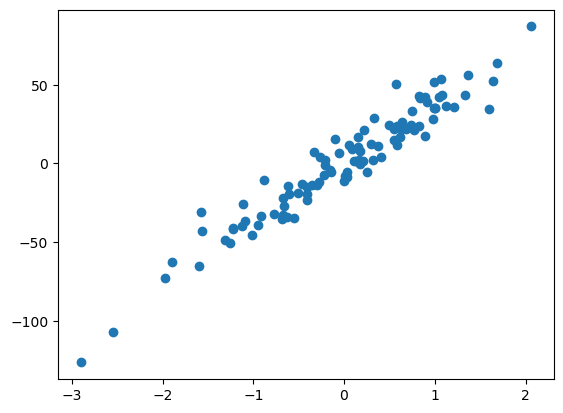

In [35]:
x, y = make_regression(n_samples=100, n_features=2, noise=10)

plt.scatter(x[:,0],y) # affichage des résultats. x en abs, y en ord

In [36]:
# Verification des dimensions des matrices 
print(x.shape)
print(y.shape)

# Redimension de y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100,)
(100, 1)


In [37]:
# Création de la matrice X, inclut le biais 
# Ne pas oublier de se baser sur le nb d'éléments pour x1 ou xn et 1 seule colonne
X = np.hstack((x, np.ones((x.shape[0],1)))) 

print(X.shape)
print(X[:10])

(100, 3)
[[-0.94397457  0.37025295  1.        ]
 [ 0.31505095 -0.9103714   1.        ]
 [-0.15793022  1.51758752  1.        ]
 [-0.21223764 -0.72391433  1.        ]
 [-1.59328754 -0.47001403  1.        ]
 [ 1.20674297 -0.26317838  1.        ]
 [ 1.04806481  1.08055496  1.        ]
 [ 0.37203015 -0.72385877  1.        ]
 [ 1.00304467  0.51846456  1.        ]
 [-1.109629    1.29863735  1.        ]]


In [38]:
# Initialisation du vecteur theta aléatoire 
theta = np.random.randn(3, 1)
theta

array([[0.37164409],
       [0.19551668],
       [1.91437889]])

### 3.2. Modele Linéaire
Dans ce cas nous n'avons pas besoin de le modifier.

In [39]:
def model(X, theta):
    return X.dot(theta)

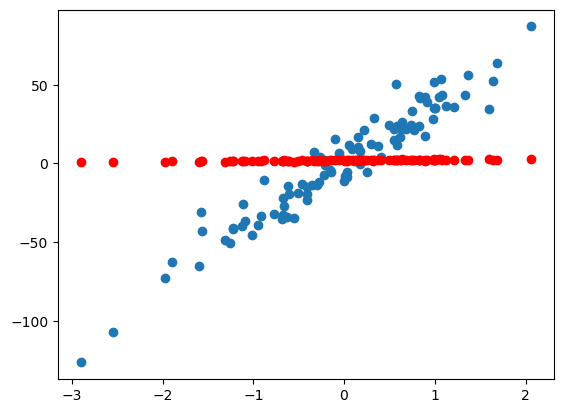

In [40]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c='r')

### 3.3. La fonction coût
Dans ce cas nous n'avons pas besoin de la modifier.

In [41]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [42]:
cost_function(X, y, theta)

620.6552930548949

### 3.4. Gradients et descente de gradient
Encore une fois on a pas besoin de le modifier.

In [43]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [44]:
def gradient_descent(X, y, theta, learning_rate, n_iterations): 

    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

### 3.5. Phase d'entrainement 

In [45]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [46]:
theta_final # Voici les paramètres finaux une fois que la machine a été entrainée

array([[37.59173511],
       [ 4.23830412],
       [ 0.15332647]])

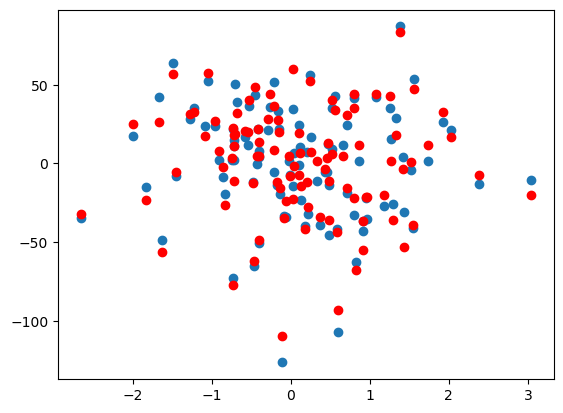

In [48]:
# Création d'un vecteur prédictions qui contient les predictions de notre modele finale
predictions = model(X, theta_final)

# Affichage des résultats de predictions (en rouge)
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], predictions, c='r')

### 3.6. Courbe d'apprentissage 

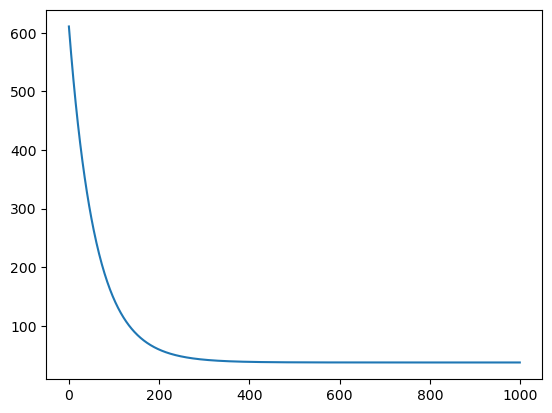

In [49]:
plt.plot(range(n_iterations), cost_history)

## 4. Visualisation du modèle en 3D

Si on regarde les plot selon $ x_1 $ ou $ x_2 $ le nuage de points est plus ou moins éclaté, ce qui est normal. Plus on rajoute de dimensions (features, nb de $ x $), plus la nécessité de visualiser le modèle en 3D est nécessaire.

In [54]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)

<IPython.core.display.Javascript object>